# Stata in Jupyter Example Notebook

This notebook demonstrates how to use Stata within Jupyter Lab using the `nbstata` package.

## Basic Stata Commands

First, let's load a built-in dataset and explore it:

In [1]:
# Load the auto dataset
sysuse auto, clear

# Display basic information
describe

Unknown #command
Unknown #command
(1978 automobile data)

Contains data from /Applications/Stata/ado/base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2022 17:45
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)


## Summary Statistics

In [2]:
* Get summary statistics for all variables
summarize

* Detailed summary for specific variables
summarize price mpg weight, detail


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------------------
  gear_ratio |         74    3.014865

## Data Visualization

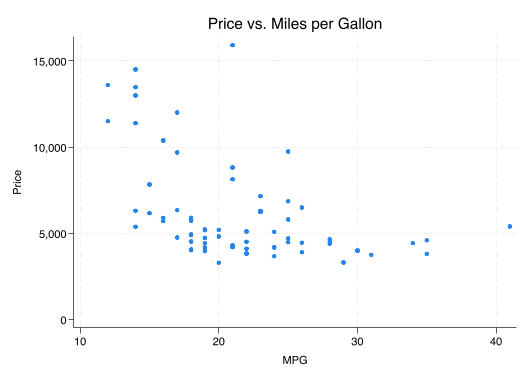

In [3]:
* Create a scatter plot
scatter price mpg, title("Price vs. Miles per Gallon") xtitle("MPG") ytitle("Price")

(bin=10, start=3291, width=1261.5)


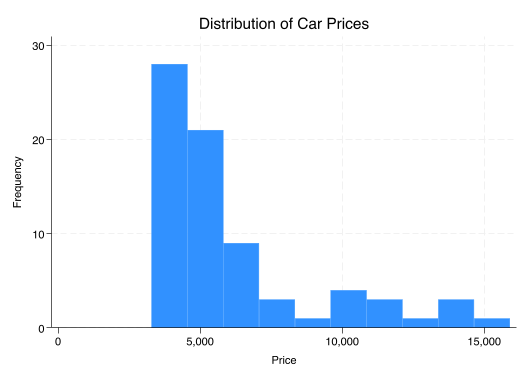

In [4]:
* Create a histogram
histogram price, bins(10) frequency title("Distribution of Car Prices")

## Regression Analysis

In [5]:
* Simple linear regression
regress price mpg weight foreign

* Display results
estimates table, b se t p


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(3, 70)        =     23.29
       Model |   317252881         3   105750960   Prob > F        =    0.0000
    Residual |   317812515        70  4540178.78   R-squared       =    0.4996
-------------+----------------------------------   Adj R-squared   =    0.4781
       Total |   635065396        73  8699525.97   Root MSE        =    2130.8

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |    21.8536   74.22114     0.29   0.769    -126.1758     169.883
      weight |   3.464706    .630749     5.49   0.000     2.206717    4.722695
     foreign |    3673.06   683.9783     5.37   0.000     2308.909    5037.212
       _cons |  -5853.696   3376.987    -1.73   0.

In [6]:
* Post-estimation diagnostics
predict residuals, residuals
predict fitted, xb

* Check for heteroskedasticity
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of price

H0: Constant variance

    chi2(1) =   6.34
Prob > chi2 = 0.0118


## Creating New Variables

In [ ]:
* Create a categorical variable for price
generate price_cat = .
replace price_cat = 1 if price < 5000
replace price_cat = 2 if price >= 5000 & price < 10000
replace price_cat = 3 if price >= 10000

label define price_label 1 "Low" 2 "Medium" 3 "High"
label values price_cat price_label

* Tabulate the new variable
tabulate price_cat

## Cross-tabulation and Tests

In [3]:
* Cross-tabulation with chi-square test
tabulate foreign price_cat, chi2 row

SyntaxError: invalid syntax (703519745.py, line 1)

## Correlation Matrix

In [ ]:
* Correlation matrix for continuous variables
correlate price mpg weight length turn displacement

## Using Mata (Stata's Matrix Language)

In [ ]:
* Simple matrix operations in Mata
mata:
    // Create a matrix
    A = (1, 2, 3 \ 4, 5, 6 \ 7, 8, 9)
    
    // Display the matrix
    A
    
    // Calculate determinant
    det(A)
    
    // Calculate eigenvalues
    eigensystem(A)
end

## Tips for Using Stata in Jupyter

1. **Kernel**: Make sure you've selected the Stata kernel (not Python)
2. **Comments**: Use `*` for single-line comments and `/* */` for multi-line
3. **Help**: Use `help command_name` to get documentation
4. **Working Directory**: Use `pwd` to see current directory and `cd` to change it
5. **Data Import**: You can import various formats:
   - CSV: `import delimited "file.csv", clear`
   - Excel: `import excel "file.xlsx", clear firstrow`
   - Stata: `use "file.dta", clear`